In [33]:
import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras import backend as K

from sklearn.metrics import confusion_matrix


In [34]:
img_rows, img_cols = 28, 28

In [35]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [36]:
x_train.shape

(60000, 28, 28)

In [37]:
y_train.shape

(60000,)

In [38]:
x_test.shape

(10000, 28, 28)

In [39]:
y_test.shape

(10000,)

In [40]:
def display_image(data, nrows, ncols, index):
    plt.subplot(nrows, ncols, index)    
    plt.imshow(data, cmap='gray')

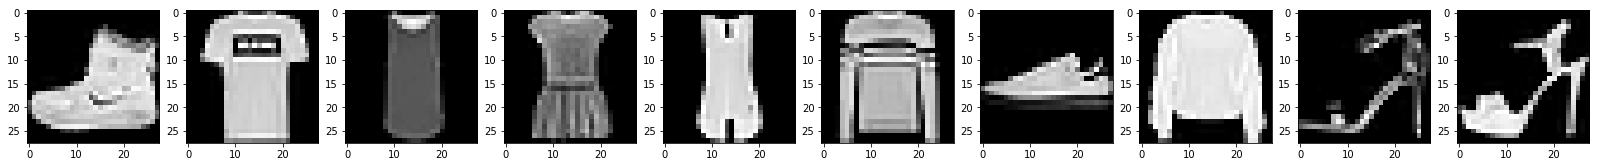

In [41]:
ncols = 10
plt.figure(figsize=(28,28))

for i in range(ncols):
    display_image(x_train[i], 1, ncols, i+1)

In [42]:
labels = { 0: 'T-shirt/Top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', \
           5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag' , 9: 'Ankle boot'}

In [43]:
batch_size = 128 
num_classes = 10
epochs = 5
#Processing time is low that's why I kept the number of epochs 5.

In [44]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

In [45]:
y_train = keras.utils.to_categorical(y_train, num_classes)

y_test = keras.utils.to_categorical(y_test, num_classes)


In [46]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0],1,img_rows,img_cols)
    x_test = x_test.reshape(x_test.shape[0],1,img_rows,img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0],img_rows,img_cols,1)
    x_test = x_test.reshape(x_test.shape[0],img_rows,img_cols,1)
    input_shape = (img_rows, img_cols, 1)

In [64]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))

model.add(Conv2D(64, (3, 3), activation='relu'))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(num_classes, activation='softmax'))

In [65]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 22, 22, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 11, 11, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 7744)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               991360    
__________

In [66]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.SGD(lr=0.10, momentum=0.01, decay=0.005),     
              metrics=['accuracy'])

In [67]:
%%time

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 400s 7ms/step - loss: 1.0137 - acc: 0.6203 - val_loss: 0.5632 - val_acc: 0.7777
Epoch 2/5
60000/60000 [==============================] - 420s 7ms/step - loss: 0.6771 - acc: 0.7499 - val_loss: 0.5220 - val_acc: 0.7977
Epoch 3/5
60000/60000 [==============================] - 425s 7ms/step - loss: 0.6225 - acc: 0.7719 - val_loss: 0.5028 - val_acc: 0.8032
Epoch 4/5
60000/60000 [==============================] - 410s 7ms/step - loss: 0.6001 - acc: 0.7821 - val_loss: 0.4864 - val_acc: 0.8053
Epoch 5/5
60000/60000 [==============================] - 409s 7ms/step - loss: 0.5783 - acc: 0.7881 - val_loss: 0.4759 - val_acc: 0.8132
Wall time: 34min 24s


In [68]:
x_test.shape

(10000, 28, 28, 1)

In [69]:
y_test.shape

(10000, 10)

In [70]:
score = model.evaluate(x_test, y_test, verbose=1)

print('Test loss:', score[0])

print('Test accuracy:', score[1])

10000/10000 [==============================] - 23s 2ms/step
Test loss: 0.47589507887363436
Test accuracy: 0.8132


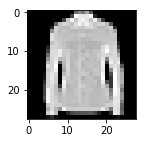

In [71]:
plt.figure(figsize=(2,2))
plt.imshow(x_test[26].reshape(28, 28), cmap='gray')

In [72]:
t = model.predict(x_test[26].reshape(-1,28,28,1))

cls = np.argmax(t)

print(cls)
print(labels[cls])

4
Coat


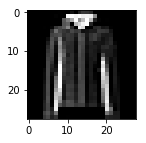

In [73]:
plt.figure(figsize=(2,2))
plt.imshow(x_test[6].reshape(28, 28), cmap='gray')

In [74]:
t = model.predict(x_test[6].reshape(-1,28,28,1))

cls = np.argmax(t)

print(cls)
print(labels[cls])

4
Coat


In [75]:
predicted = model.predict(x_test)
true_prediction = []
found_prediction = []
for p in predicted:
    found_prediction.append(np.argmax(p))
for q in y_test:
    true_prediction.append(np.argmax(q))    
    
confusion_matrix(true_prediction, found_prediction)

array([[867,   3,  22,  34,   6,   2,  50,   1,  15,   0],
       [  3, 961,   0,  27,   4,   1,   2,   0,   2,   0],
       [ 17,   1, 708,   8, 232,   1,  27,   0,   6,   0],
       [ 28,  11,  14, 871,  46,   1,  25,   0,   4,   0],
       [  1,   4, 100,  39, 833,   0,  19,   0,   4,   0],
       [  0,   0,   0,   0,   0, 951,   0,  26,   2,  21],
       [283,   1, 317,  25, 246,   1, 105,   0,  22,   0],
       [  0,   0,   0,   0,   0,  29,   0, 932,   0,  39],
       [  1,   1,  12,   5,   7,   2,   4,   6, 961,   1],
       [  0,   0,   0,   0,   0,  10,   0,  46,   1, 943]], dtype=int64)

In [76]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',     
              metrics=['accuracy'])

In [77]:
%%time

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 415s 7ms/step - loss: 0.5600 - acc: 0.7971 - val_loss: 0.4160 - val_acc: 0.8467
Epoch 2/5
60000/60000 [==============================] - 426s 7ms/step - loss: 0.4322 - acc: 0.8486 - val_loss: 0.3402 - val_acc: 0.8798
Epoch 3/5
60000/60000 [==============================] - 429s 7ms/step - loss: 0.3754 - acc: 0.8693 - val_loss: 0.3015 - val_acc: 0.8959
Epoch 4/5
60000/60000 [==============================] - 406s 7ms/step - loss: 0.3301 - acc: 0.8862 - val_loss: 0.2753 - val_acc: 0.9006
Epoch 5/5
60000/60000 [==============================] - 403s 7ms/step - loss: 0.3050 - acc: 0.8959 - val_loss: 0.2559 - val_acc: 0.9091
Wall time: 34min 39s


In [78]:
score = model.evaluate(x_test, y_test, verbose=1)

print('Test loss:', score[0])

print('Test accuracy:', score[1])

10000/10000 [==============================] - 24s 2ms/step
Test loss: 0.2559213873386383
Test accuracy: 0.9091


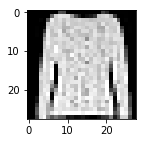

In [79]:
plt.figure(figsize=(2,2))
plt.imshow(x_test[89].reshape(28, 28), cmap='gray')

In [80]:
t = model.predict(x_test[89].reshape(-1,28,28,1))

cls = np.argmax(t)

print(cls)
print(labels[cls])

6
Shirt


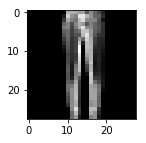

In [81]:
plt.figure(figsize=(2,2))
plt.imshow(x_test[65].reshape(28, 28), cmap='gray')

In [82]:
t = model.predict(x_test[65].reshape(-1,28,28,1))

cls = np.argmax(t)

print(cls)
print(labels[cls])

1
Trouser


In [83]:
predicted = model.predict(x_test)
true_prediction = []
found_prediction = []
for p in predicted:
    found_prediction.append(np.argmax(p))
for q in y_test:
    true_prediction.append(np.argmax(q))

confusion_matrix(true_prediction, found_prediction)

array([[820,   1,  15,  17,   1,   1, 140,   0,   5,   0],
       [  0, 979,   0,  12,   2,   0,   5,   0,   2,   0],
       [ 14,   0, 877,   7,  46,   0,  55,   0,   1,   0],
       [ 10,   2,  11, 916,  12,   0,  48,   0,   1,   0],
       [  0,   1,  43,  38, 853,   0,  63,   0,   2,   0],
       [  0,   0,   0,   0,   0, 986,   0,   6,   0,   8],
       [ 81,   1,  69,  20,  64,   0, 748,   0,  17,   0],
       [  0,   0,   0,   0,   0,  16,   0, 966,   0,  18],
       [  0,   1,   0,   4,   1,   3,   4,   1, 986,   0],
       [  0,   0,   0,   0,   0,   6,   0,  34,   0, 960]], dtype=int64)

In [84]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adagrad(lr=0.010, epsilon=None, decay=0.005),     
              metrics=['accuracy'])

In [85]:
%%time

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 415s 7ms/step - loss: 0.2933 - acc: 0.8996 - val_loss: 0.2476 - val_acc: 0.9156
Epoch 2/5
60000/60000 [==============================] - 397s 7ms/step - loss: 0.2525 - acc: 0.9139 - val_loss: 0.2402 - val_acc: 0.9185
Epoch 3/5
60000/60000 [==============================] - 401s 7ms/step - loss: 0.2454 - acc: 0.9153 - val_loss: 0.2392 - val_acc: 0.9190
Epoch 4/5
60000/60000 [==============================] - 401s 7ms/step - loss: 0.2423 - acc: 0.9170 - val_loss: 0.2387 - val_acc: 0.9190
Epoch 5/5
60000/60000 [==============================] - 424s 7ms/step - loss: 0.2394 - acc: 0.9180 - val_loss: 0.2387 - val_acc: 0.9187
Wall time: 33min 58s


In [86]:
score = model.evaluate(x_test, y_test, verbose=1)

print('Test loss:', score[0])

print('Test accuracy:', score[1])

10000/10000 [==============================] - 23s 2ms/step
Test loss: 0.23868165065050126
Test accuracy: 0.9187


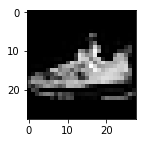

In [87]:
plt.figure(figsize=(2,2))
plt.imshow(x_test[160].reshape(28, 28), cmap='gray')

In [88]:
t = model.predict(x_test[160].reshape(-1,28,28,1))

cls = np.argmax(t)

print(cls)
print(labels[cls])

7
Sneaker


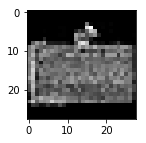

In [89]:
plt.figure(figsize=(2,2))
plt.imshow(x_test[298].reshape(28, 28), cmap='gray')

In [90]:
t = model.predict(x_test[298].reshape(-1,28,28,1))

cls = np.argmax(t)

print(cls)
print(labels[cls])

8
Bag


In [91]:
predicted = model.predict(x_test)
true_prediction = []
found_prediction = []
for p in predicted:
    found_prediction.append(np.argmax(p))
for q in y_test:
    true_prediction.append(np.argmax(q))    
    
confusion_matrix(true_prediction, found_prediction)

array([[878,   1,  12,  14,   3,   1,  89,   0,   2,   0],
       [  0, 979,   0,  11,   3,   0,   5,   0,   2,   0],
       [ 16,   1, 880,   7,  50,   0,  46,   0,   0,   0],
       [ 11,   5,   8, 925,  23,   0,  27,   0,   1,   0],
       [  1,   1,  38,  29, 886,   0,  44,   0,   1,   0],
       [  0,   0,   0,   0,   0, 984,   0,  10,   0,   6],
       [105,   1,  54,  24,  70,   0, 738,   0,   8,   0],
       [  0,   0,   0,   0,   0,   9,   0, 979,   0,  12],
       [  1,   2,   4,   2,   2,   5,   1,   2, 980,   1],
       [  0,   0,   0,   0,   0,   6,   0,  36,   0, 958]], dtype=int64)

Confusion Matrix show confusion between:
Shirt - T-Shirt/Top, pullover and coat

Accuracy epoch = 5 (Due to low performance of my laptop)
SGD optimizer - 81.32%
Adam optimizer - 90.91%
Adagrad optimizer - 91.87%
